# Airline Customer Satisfaction Capstone

## Notebook 3: Modeling
### BrainStation Data Science Bootcamp
#### By Ali Idris

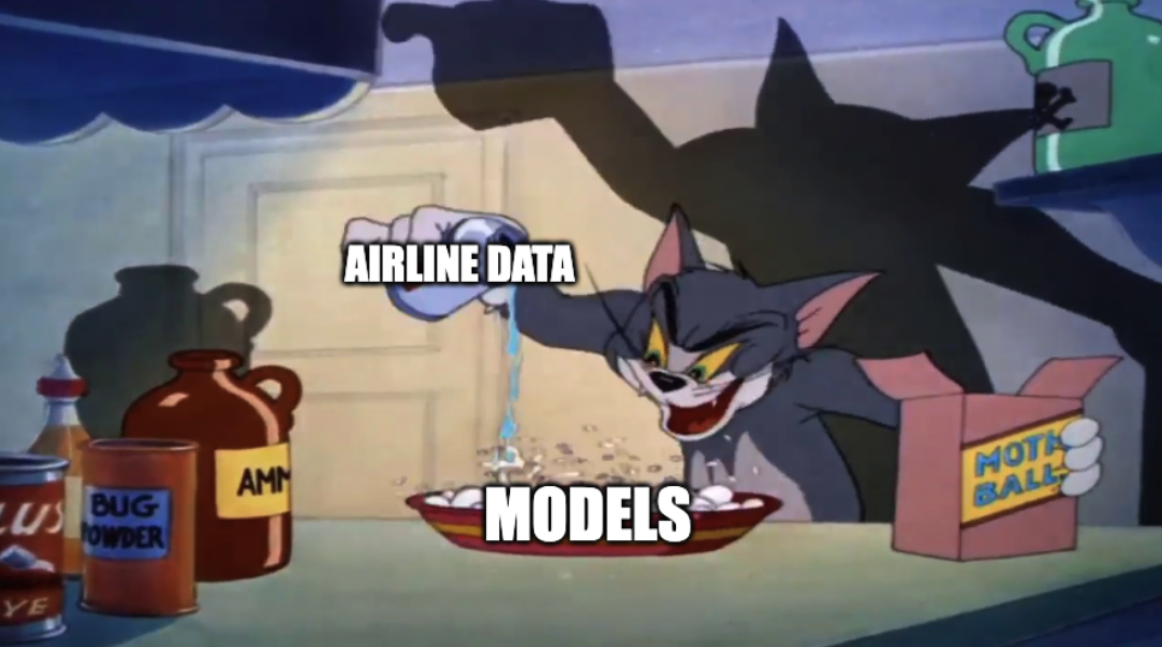

In the last notebook, I conducted a univariate, multivariate and correlation analysis. I also prepared the data to be fed into machine learning models.

In this notebook, I will build, run and evaluate the results from my models.

Further details can be found below:

## Notebook Contents

##### SECTION 1

- Build a logistic model pipeline
- Manually build a logistic model using the optimal hyperparameters shown by the pipeline
- Identify feature importance from the logistic model

##### SECTION 2

- Build a KNN model pipeline
- Manually build a KNN model using the optimal hyperparameters shown by the pipeline
- Identify feature importance from the KNN

##### SECTION 3

- Build a decision tree model pipeline
- Manually build a decision tree model using the optimal hyperparameters shown by the pipeline
- Identify feature importance from the decision tree model

##### SECTION 4

- Go through the feature importance of the best performing model

##### SECTION 5

- Feature engineering

##### SECTION 6

- Re-Run the model with the new feature

***

Throughout this notebook, I will take several steps to avoid data leakage (i.e. showing the test data at the wrong time). For example, I fit on the train data only and structure the code blocks, so the test dataset is never considered.

Importing libraries.

In [121]:
# Below I am importing the relavent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             plot_roc_curve, roc_auc_score)

In [122]:
# Below I am omporting the 'cleaned_airlines2' file that we exported in notebook 2
df = pd.read_csv('../data/cleaned_airlines2.csv')

# Below I am dropping the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [123]:
# Below I am sanity checking tha the dataframe was imported correctly and doesn't have the 'Unnamed: 0' column
df.head(2)

,customer_age,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,gate_location_satisfaction_rating,food/drink_satisfaction_rating,online_boarding_satisfaction_rating,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,...,checkin_service_satisfaction_rating,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,satisfaction_target_Satisfied,customer_gender_Male,customer_loyalty_type_Loyal,customer_travel_type_Personal,customer_class_type_Economy,customer_class_type_Economy Plus
0,56,369,0,2,0,4,3,0,3,3,...,3,4,3,0,1,1,0,1,1,0
1,49,2486,0,2,1,4,2,1,3,2,...,4,3,2,0,1,1,0,1,1,0


***

## SECTION 1

## Logistic Model

First, I will create a base logistic model to compare to the optimised logistic model.

###### Base Logistic Model

In [124]:
# Below I am setting our train dataset target y to 'rating'
y = df['satisfaction_target_Satisfied']

# Below I am setting our train dataset data to every column besides 'rating'
X = df.drop('satisfaction_target_Satisfied', axis = 1)

#Below I am employing a train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
X, y, test_size=0.33, random_state=42)

# Below I am instantiating the logistic model
LogRegBase = LogisticRegression(solver = 'lbfgs')

# Below I am fitting the logistic regression model to the training data
LogRegBase.fit(X_train1, y_train1)

print(f"The base logistic model scored:  {LogRegBase.score(X_train1, y_train1)}.")

The base logistic model scored:  0.8283363403394661.


Our base model scored 0.82. Next we will see what our optimised model scores and compare the two.

###### Optimised Logistic Model

I will use an ML pipeline to identify what type of model I should build. This is much faster than trying each version of the logistic model manually.

In [9]:
# Below I am setting our train dataset target y to 'rating'
y = df['satisfaction_target_Satisfied']

# Below I am setting our train dataset data to every column besides 'rating'
X = df.drop('satisfaction_target_Satisfied', axis = 1)

# Below I am using a standardscaler, pca and a logistic regression model
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('log', LogisticRegression())]

cachedir = mkdtemp()
pipe = Pipeline(estimators, memory = cachedir)


# The pipeline will run through these series of cost functions and number of PCA components and see parameters run best
params = {'log__C': [0.1, 1, 3, 5, 7, 10], 
          'reduce_dim__n_components': [None, 2, 5, 10]}

# Below I am using a cross validatoin gridsearch
grid_search = GridSearchCV(pipe, param_grid=params)

# Below I am splitting the dataframe into a train and test split.
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, stratify=y, random_state=0)

# Below I am fitting the model to the training data
fitted_search = grid_search.fit(X_train, y_train)

print(f"The fitted search score is {fitted_search.score(X_test, y_test)}")
print(f"The best parameters for the model are {fitted_search.best_params_}")

The fitted search score is 0.8715737603942101
The best parameters for the model are {'log__C': 1, 'reduce_dim__n_components': None}


## Running Optimal Logistic Model Code Seperately

###### Scaling the data

In [10]:
# scale the data
scaler = StandardScaler()

# fit on train set
X_train_scaled = scaler.fit_transform(X_train)

# use it to transform test set
X_test_scaled = scaler.transform(X_test)

print(f"Scaled train shape is {X_train_scaled.shape} and scaled test shape is {X_test_scaled.shape}")

Scaled train shape is (90916, 22) and scaled test shape is (38964, 22)


We can confirm that the test train split function worked correctly.

###### Running Optimal Logistic Code Manually

In [11]:
# Below I am instantiating the model
LogRegOpt = LogisticRegression(C=0.1,random_state=0)

# Below I am fitting the logistic regression model to the scaled training data
LogRegOpt.fit(X_train_scaled, y_train)

print(f"The train score is {LogRegOpt.score(X_train_scaled, y_train)} and the test score is {LogRegOpt.score(X_test_scaled, y_test)}.")

The train score is 0.8755444586211448 and the test score is 0.8716507545426547.


###### Comparing our base and optimised logistic model score

In [12]:
base_logreg_model = LogRegBase.score(X_train1, y_train1)
                     
optimised_logreg_model = LogRegOpt.score(X_train_scaled, y_train)

diff_logreg_models = (optimised_logreg_model-base_logreg_model)

prcnt_diff_logreg_models = ((optimised_logreg_model-base_logreg_model)/(base_logreg_model))

rounded_diff_logreg_models = round(diff_logreg_models, 2)

rounded_prcnt_diff_logreg_models = round(prcnt_diff_logreg_models, 2)

print(f"The optimised logistic model scored higher than the base model by {rounded_diff_logreg_models}, which is a percentage increase of {rounded_prcnt_diff_logreg_models}")

The optimised logistic model scored higher than the base model by 0.05, which is a percentage increase of 0.06


###### Takeaways:
1. Our optimised model scored 6% higher, which is good
2. Both our base and the optimised score is much higher than an average guess (0.5)
3. The train and test score of our optimised model is very similar; there is only a minute level of overfitting

Next, we will look at the feature importance of each feature in the logistic model. With logistic models, we can use the [built-in 'coefficients'](https://machinelearningmastery.com/calculate-feature-importance-with-python/) to identify which features best predict our target. source for below 

## Feature Importance

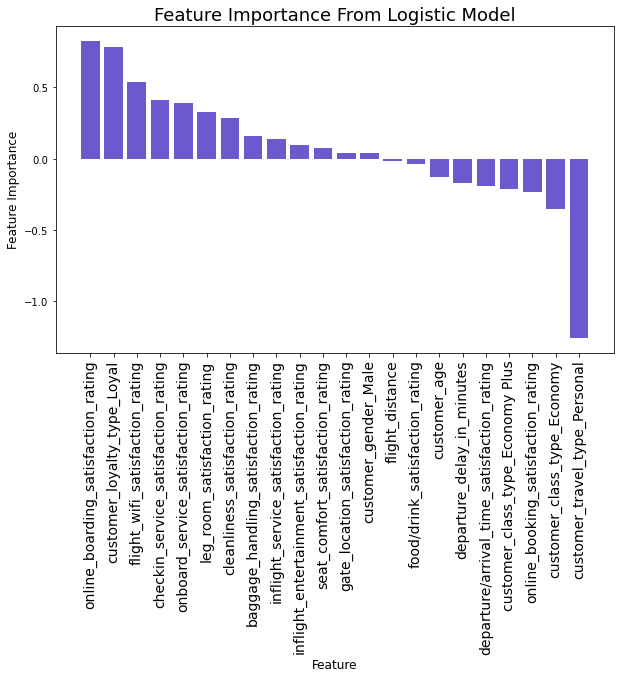

In [13]:
# Below I am running the model, getting the coefficients, putting it in a dataframe and then plotting the dataframe
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
}) # I am ordering each feature by importance descending
importances = importances.sort_values(by='Importance', ascending=False)

# Below I am plotting the data so we can visually identify feature importance
plt.figure(figsize=(10, 6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='slateblue')
plt.xlabel('Feature', fontsize=12)   
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance From Logistic Model', size=18)
plt.xticks(rotation='vertical', fontsize=14)
plt.show()

###### Interpreting the feature importance results

- The higher the feature importance score, the more the logistic model can predict if a customer is satisfied based solely on that feature
- The lower the feature importance score, the more the logistic model can predict if a customer is dissatisfied based solely on that feature
- The higher the deviation from 0, the more the model can predict customer satisfaction based solely on that feature
- Therefore, the features of note are those at either end of the graph


Features that lead to customer satisfaction include (to invest more into)
- Online boarding
- Already loyal customers
- Inflight wifi
- Checkin Service
- Onboard Service

Features that lead to customer dissatisfaction (to improve/re-allocate funding to)
- Customer's travelling for personal reasons
- Economy class
- Online booking
- Departure/Arrival Time
- Customer Age

## Classification report & Confusion matrix

In [16]:
# Below I make a prediction based off the scaled test data using the built in .predict function
y_pred = LogRegOpt.predict(X_test_scaled)

# Below I am printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22036
           1       0.87      0.83      0.85     16928

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964



Out of all the times that the model predicted a customer would be satisfied, 89% of the time, they actually were satisfied.

Out of all the customers who were satisfied, the model predicted this outcome correctly for 82% of customers.

The f1 score predicting if a customer was satisfied is 0.86, which is reasonably high.

In [17]:
# Below I am instantiating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# I print out a basic confusion matrix so I can confirm the confusion matrix shown next is corret
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Actually Positive", "Actually Negative"],
    index=["Predicted Positive", "Predicted Negative"]
)

print(cf_df)

                    Actually Positive  Actually Negative
Predicted Positive              19863               2173
Predicted Negative               2828              14100


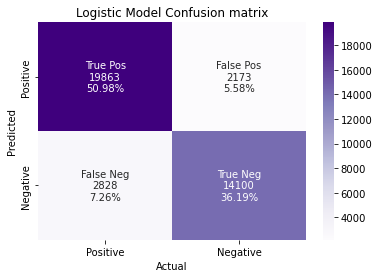

In [18]:
group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Purples')

ax.set_title('Logistic Model Confusion matrix');
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

## Below I am setting the axis names
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

## Below I am displaying the confusion matrix
plt.show()

As mentioned previously, our optimised logistic model had a score of 0.87. The confusion matrix allows us to analyse our accuracy even deeper.

1. The model correctly labels (50.98 + 36.19) ~87% of the results correctly as we would expect
2. The model has incorrectly predicted 7.26% of instances as false negatives. Meaning it has incorrectly stated a feature lead to customer dissatisfaction when it didn't.
3. The model incorrectly predicted 5.58% of instances as false positives. This means the model stated a feature lead to customer satisfaction when it didn't. 

***

## KNN  Model

First, I will create a base KNN model to compare to the optimised KNN model.

###### Base KNN Model

In [127]:
from sklearn.neighbors import KNeighborsClassifier

# Below I am instantiating the KNN model
base_knn_model = KNeighborsClassifier()
# Below I am fitting the KNN model to the data
base_knn_model.fit(X_train1, y_train1)

print(f"The base KNN model score is {base_knn_model.score(X_train1, y_train1)}.")

The base KNN model score is 0.839885542237902.


###### Comparing the base KNN model to the base logistic model

In [128]:
base_knn_model_score = base_knn_model.score(X_train1, y_train1)

In [129]:
base_knn_model_score

0.839885542237902

In [110]:
knn_base_vs_logreg_base = base_knn_model_score - base_logreg_model

print(f"The bass KNN model has a higher score than the base logistic model by {round(knn_base_vs_logreg_base, 2)}.")

The bass KNN model has a higher score than the base logistic model by 0.01.


We can see that the base KNN model performs slightly better than the base logistic model. Let's see how the optimised models compare.

###### Optimal KNN model

In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('KNN', KNeighborsClassifier())]

cachedir = mkdtemp()
pipe = Pipeline(estimators, memory = cachedir)

params = {'KNN__n_neighbors': [1, 3, 5, 7, 9, 12], 
          'reduce_dim__n_components': [None, 2, 5, 10]}

grid_search = GridSearchCV(pipe, param_grid=params)

fitted_search = grid_search.fit(X_train, y_train)

print(f"The fitted search score is {fitted_search.score(X_test, y_test)}")
print(f"The best parameters for the model are {fitted_search.best_params_}")

The fitted search score is 0.9272661944358895
The best parameters for the model are {'KNN__n_neighbors': 9, 'reduce_dim__n_components': None}


There is a large increase in the optimised KNN model score. Let's explore this further and compare the optimised scores in the next section.

## Run code seperately

###### Running optimal KNN model manually 

In [43]:
# Below I am instantiating the KNN model
optimal_knn_model = KNeighborsClassifier(n_neighbors = 9)
# Below I am fitting the KNN model to the data
optimal_knn_model.fit(X_train_scaled, y_train)

print(f"The train score is {optimal_knn_model.score(X_train_scaled, y_train)} and the test score is {optimal_knn_model.score(X_test_scaled, y_test)}.")

The train score is 0.9407365040256941 and the test score is 0.9272661944358895.


In [75]:
base_knn_model_score = base_knn_model.score(X_train1, y_train1)
                     
optimised_knn_model_score = optimal_knn_model.score(X_train_scaled, y_train)

diff_knn_models = optimised_knn_model_score-base_knn_model_score

prcnt_diff_knn_models = (diff_knn_models/base_knn_model_score)

rounded_diff_knn_models = round(diff_knn_models, 2)

rounded_prcnt_diff_knn_models = round(prcnt_diff_knn_models, 2)

print(f"The optimised knn model scored higher than the base model by {rounded_diff_knn_models}, which is a percentage increase of {rounded_prcnt_diff_knn_models}")

The optimised knn model scored higher than the base model by 0.1, which is a percentage increase of 0.12


###### Takeaways:
1. Our optimised model scored 12% higher than the base model, which is impressive
2. Both our base and the optimised score is much higher than an average guess (0.5)
3. The train score is slightly higher than the test score, showing a small level of overfitting

Next, we will look at the feature importance of each feature in the KNN model. Unlike logistic regression, there are no built-in 'coefficients'. Instead, we will use 'permutation importance', a built-in library of scikit-learn. You can read more about how it works [here](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

In [33]:
# Below I am importing the relavent permutation_importance package
from sklearn.inspection import permutation_importance

Due to run time, I'll use 30% of the dataset in the remaining sections

In [78]:
# Below I am instantiing the permutation_importance of the KNN model to 'result'
result = permutation_importance(optimal_knn_model, X_test_scaled[:38964], y_test[:38964], n_repeats=10)                     

In [79]:
# We can see the feature importance as a number in an array but this isn't the easiest way to see it
result.importances_mean

array([0.00513038, 0.00193512, 0.05026178, 0.00228159, 0.01632789,
       0.00317986, 0.00067755, 0.0167026 , 0.00577969, 0.00081101,
       0.00149882, 0.00403706, 0.00438353, 0.00619803, 0.00383431,
       0.00473771, 0.00121907, 0.00027718, 0.04852685, 0.03997536,
       0.01280926, 0.00902628])

Similar to the logistic model, I will convert the array to a dataframe and plot the results.

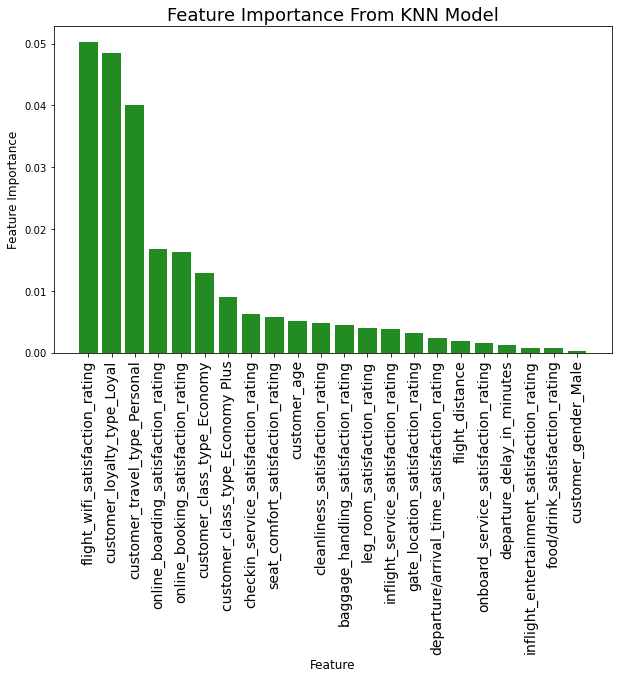

In [80]:
# Below I am converting the array to a dataframe
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': result.importances_mean
})
importances = importances.sort_values(by='Importance', ascending=False)


# Below I am plotting the data
plt.figure(figsize=(10, 6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='forestgreen')
plt.xlabel('Feature', fontsize=12)   
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance From KNN Model', size=18)
plt.xticks(rotation='vertical', fontsize=14)
plt.show()

###### Interpreting the feature importance results

- The higher the feature importance score, the more the model is able to accurately able to predict customer satisfaction/dissatisfaction
- The lower the feature importance score, the less the model is able to accurately able to predict customer satisfaction/dissatisfaction

This means we don't know whether the airline should invest or divest from the feature in question. Instead, we can point to features the airline should look into and identify if it usually leads to customer satisfaction or not.

Features that have a large impact on customer satisfaction:
- inflight wifi
- already loyal customers 
- customers travelling for personal reasons
- online boarding
- online booking

Features that have minimal impact on customer satisfaction
- customer gender
- food/drink
- inflight entertainment
- departure delay
- onboard service

## Classification report & Confusion matrix

In [82]:
# Below I make a prediction based off the scaled test data using the built in .predict function
y_pred = optimal_knn_model.predict(X_test_scaled[:38964])

In [83]:
# Below I am printing the classification report
print(classification_report(y_test[:38964], y_pred[:38964]))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     22036
           1       0.95      0.88      0.91     16928

    accuracy                           0.93     38964
   macro avg       0.93      0.92      0.93     38964
weighted avg       0.93      0.93      0.93     38964



Out of all the times that the model predicted a customer would be satisfied, 95% of the time, they actually were satisfied.

Out of all the customers who were satisfied, the model predicted this outcome correctly for 88% of customers.

The f1 score predicting if a customer was satisfied is 0.91, which is high.

In [84]:
# Below I am instantiating the confusion matrix
cf_matrix = confusion_matrix(y_test[:138964], y_pred[:38964])

# I print out a basic confusion matrix so I can confirm the confusion matrix shown next is corret
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Actually Positive", "Actually Negative"],
    index=["Predicted Positive", "Predicted Negative"]
)

print(cf_df)

                    Actually Positive  Actually Negative
Predicted Positive              21282                754
Predicted Negative               2080              14848


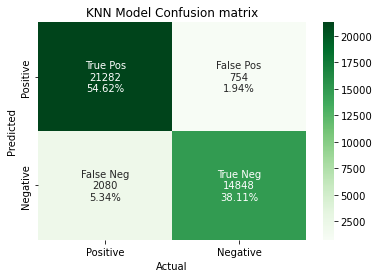

In [85]:
group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

ax.set_title('KNN Model Confusion matrix');
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

## Below I am setting the axis names
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

## Below I am displaying the confusion matrix
plt.show()

As mentioned previously, I am only using 30% of the total dataset for the confusion matrix and feature importance due to run time. This is where there is a slight discrepancy between the KNN model score (0.94) and the confusion matrix score (92.73).

Takeaways:

1. The model correctly labels 92.7% of results (54.62 + 38.11)
2. The model has incorrectly predicted 5.34% of instances as false negatives. Meaning it has incorrectly stated a feature lead to customer dissatisfaction when it didn't.
3. The model incorrectly predicted 1.94% of instances as false positives. This means the model stated a feature lead to customer satisfaction when it didn't. 

***

## SECTION 3

## Decision Tree

###### Base Model

First, I will create a base decision tree model.

In [130]:
# Below I am instantiating the decision tree model
base_dt_model = DecisionTreeClassifier()
# Below I am fitting the decision tree model to the data
base_dt_model.fit(X_train1, y_train1)

print(f"The base decision tree model score is {base_dt_model.score(X_train1, y_train1)}.")

The base decision tree model score is 1.0.


###### Comparing the base KNN model to the base logistic model

In [132]:
base_dt_model_score = base_dt_model.score(X_train1, y_train1)

dt_base_vs_knn_base = base_dt_model_score - base_knn_model_score

print(f"The bass DT model has a higher score than the base KNN model by {round(dt_base_vs_knn_base, 2)}.")

The bass DT model has a higher score than the base KNN model by 0.16.


###### Optimised Model

In [88]:
# importing relavent libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('DT', DecisionTreeClassifier())]

cachedir = mkdtemp()
pipe = Pipeline(estimators, memory = cachedir)

params = {'DT__max_depth': [1, 3, 5, 7, 10, 12, 15, 17, 20], 
          'reduce_dim__n_components': [None, 2, 5, 10]}

grid_search = GridSearchCV(pipe, param_grid=params)

fitted_search = grid_search.fit(X_train, y_train)

print(f"The fitted search score is {fitted_search.score(X_test, y_test)}")
print(f"The best parameters for the model are {fitted_search.best_params_}")

The fitted search score is 0.9084539574992301
The best parameters for the model are {'DT__max_depth': 15, 'reduce_dim__n_components': None}


It looks as though the KNN model still has the highest score, but I will run the model manually to make sure.

## Run code seperately

###### Running optimal DT model manually 

In [144]:
# Below I am instantiating the decision tree model
optimal_dt_model = DecisionTreeClassifier(max_depth=12)
# Below I am fitting the decision tree model to the data
optimal_dt_model.fit(X_train_scaled, y_train)

print(f"The train score is {optimal_dt_model.score(X_train_scaled, y_train)} and the test score is {optimal_dt_model.score(X_test_scaled, y_test)}.")

The train score is 0.9593690879493159 and the test score is 0.9497998152140438.


Surprisingly, the decision tree model scores much higher manually than it does in the pipeline or than the KNN model. I will plot the feature importance. With decision trees, we have the 'Gini impurity'; we can use this to derive feature importance.

In [145]:
feat_importance = optimal_dt_model.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.00296181 0.00381444 0.08556239 0.00061375 0.00061678 0.00442951
 0.00035789 0.17839767 0.00426974 0.01986974 0.00210989 0.00794463
 0.00565333 0.01141638 0.00440327 0.0028998  0.00141919 0.00023581
 0.01423923 0.07504944 0.00557082 0.00039861]


Similar to the KNN model, I will turn this array into a dataframe and plot the results.

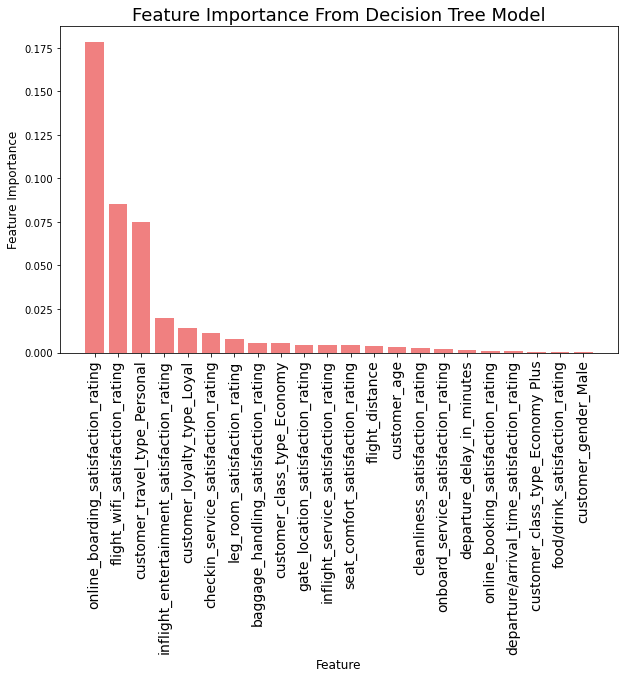

In [146]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': feat_importance
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='lightcoral')
plt.xlabel('Feature', fontsize=12)   
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance From Decision Tree Model', size=18)
plt.xticks(rotation='vertical', fontsize=14)
plt.show()

###### Interpreting the feature importance results

- The higher the feature importance score, the more the model can accurately able to predict customer satisfaction/dissatisfaction
- The lower the feature importance score, the less the model can accurately able to predict customer satisfaction/dissatisfaction

This means we don't know whether the airline should invest or divest from the feature in question. Instead, we can point to features the airline should look into and identify if it usually leads to customer satisfaction or not.

Features that have a significant impact on customer satisfaction:
- online boarding
- inflight wifi 
- customers travelling for personal reasons
- inflight entertainment
- already loyal customers

Features that have minimal impact on customer satisfaction
- food/drink
- customer gender
- economy plus
- departure delay
- online booking

## Classification report & Confusion matrix

In [147]:
# Below I make a prediction based off the scaled test data using the built in .predict function
y_pred = optimal_dt_model.predict(X_test_scaled)

In [148]:
# Below I am printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     22036
           1       0.96      0.93      0.94     16928

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



Out of all the times that the model predicted a customer would be satisfied, 96% of the time, they were satisfied.

Out of all the customers who were satisfied, the model predicted this outcome correctly for 93% of customers.

The f1 score predicting if a customer was satisfied is 0.94, which is very high.

In [151]:
# Below I am instantiating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# I print out a basic confusion matrix so I can confirm the confusion matrix shown next is corret
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Actually Positive", "Actually Negative"],
    index=["Predicted Positive", "Predicted Negative"]
)

print(cf_df)

                    Actually Positive  Actually Negative
Predicted Positive              21330                706
Predicted Negative               1250              15678


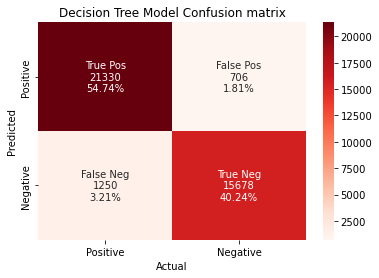

In [154]:
group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

ax.set_title('Decision Tree Model Confusion matrix');
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

## Below I am setting the axis names
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

## Below I am displaying the confusion matrix
plt.show()

Takeaways:

1. The model correctly labels 94.98% of results correctly (54.74 + 40.24) as expected 
2. The model has incorrectly predicted 3.21% of instances as false negatives. Meaning it has incorrectly stated a feature lead to customer dissatisfaction when it didn't.
3. The model incorrectly predicted 1.81% of instances as false positives. This means the model stated a feature lead to customer satisfaction when it didn't. 

***

## SECTION 4 

## Model Analysis

I have created a dataframe with all summary information from each machine learning model. This makes it easier to understand what I have achieved thus far.

In [160]:
# Below I am creating a dataframe to more easily summarise my conclusions/findings
data = {'ML Model':  ['Logistic Model','KNN Model', 'Decision Tree'],
        'Manual Test Score (3dp)': ['0.872', '0.927', '0.959'],
        'True Pos %': ['50.98', '54.62', '54.74'],
        'True Neg %': ['36.19', '38.11', '40.24'],
        'False Pos %': ['7.26', '1.94', '1.81'],
        'False Neg %': ['5.58', '5.34', '3.21']
        }

df2 = pd.DataFrame(data)

df2.head()

,ML Model,Manual Test Score (3dp),True Pos %,True Neg %,False Pos %,False Neg %
0,Logistic Model,0.872,50.98,36.19,7.26,5.58
1,KNN Model,0.927,54.62,38.11,1.94,5.34
2,Decision Tree,0.959,54.74,40.24,1.81,3.21


### Confusion Matrix Overview

True Neg: The model has correctly predicted a customer was dissatisfied

True Pos: The model has correctly predicted a customer was satisfied

False Neg: The model has incorrectly predicted a customer was dissatisfied (they were satisfied)

False Pos: The model has incorrectly predicted a customer was satisfied (they were dissatisfied)


### True/False Weighting (My paradigm for model selection)

In the case of predicting bank fraud, I would need to prioritise minimising the number/percentage of false negatives. This is because a false negative in relation to fraud will cost a bank a significant amount, far more than causing a customer to go through extra security checks needlessly (false positives).

In relation to airlines, false positives and false negatives have a similar impact.
- With false positives, the insights provided would mean the airline mistakenly believes a feature has more impact on customer satisfaction than it really does.
- With false negatives, the insights provided would mean the airline mistakenly believes the feature doesn't have an impact on customer satisfaction when it really does

_The above is only in reference to KNN and Decision Tree models. With the results of a logistic model, we see which features actively lead to customer satisfaction/dissatisfaction, not just if they have an impact on if a customer is satisfied or not._

With the insights I provide - as mentioned earlier in this notebook - further research would be required to identify if a feature is positively or negatively impacting customer satisfaction. **Therefore, I have no preference for false positives or false negatives.**

### Selecting A Model

###### Please note, that the KNN model was run with only 30% of the dataset due to slow loading times. 

#### Removing one of the models

The model with the highest scores are the KNN and Decision Tree models. In addition, the models with the lowest percentage of false positives are KNN and Decision Tree models. For example, there is 3 times the number of false positives in the regression model than in the decision tree model. For this reason, we can cut out the regression model from the selection.

#### Selecting the best model

The decision tree model outperforms the KNN model in three ways:

1. The decision tree model had a higher score than the KNN model by 0.032 (a percentage increase of 3.45%)

2. I was not able to identify feature importance or retrieve an accurate classification report/confusion matrix of the KNN model due to slow run times. Unlike the decision tree model.

3. The decision tree has 
    - ~40% fewer false negatives than the KNN model
    - ~7% less false positives than the KNN model
    
**Overall I select the decision tree as my best performing model.**

### Analysing the best model

Before going further, I must touch on 'correlation vs causation. There are many instances where two variables may be correlated (even very strongly) - but this doesn't mean they are __actually__ linked [(examples)](https://www.tylervigen.com/spurious-correlations). In other words, correlation does not always mean causation. 

This should be taken into account in my analysis, as in many cases further research would be required.

Below are my predictions vs the results from the decision tree model.

In [156]:
# Below I am creating a dataframe to more easily summarise my conclusions/findings
data2 = {'df_column':  ['online_boarding_satisfaction_rating', 'customer_travel_type_Personal', 'customer_class_type_Economy','inflight_entertainment_satisfaction_rating','seat_comfort_satisfaction_rating','onboard_service_satisfaction_rating','leg_room_satisfaction_rating','cleanliness_satisfaction_rating','flight_distance','flight_wifi_satisfaction_rating','baggage_handling_satisfaction_rating','checkin_service_satisfaction_rating','inflight_service_satisfaction_rating','food/drink_satisfaction_rating','customer_loyalty_type_Loyal','online_booking_satisfaction_rating','customer_age','customer_class_type_Economy Plus', 'arrival_delay_in_minutes', 'departure/arrival_time_satisfaction_rating', 'departure_delay_in_minutes', 'customer_gender_Male', 'gate_location_satisfaction_rating'],
        'SNS Heatmap Correlation To Target': ['0.5', '-0.45', '-0.45', '0.5', '0.5', '0.32', '0.31', '0.31', '0.3', '0.28', '0.25', '0.24', '0.24', '0.21', '0.19', '0.17', '0.13', '-0.11', '-0.058', '-0.054', '-0.051', '0.011', '-0.0028',],
        'Predicted Feature Importance From Analysis': ['2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '0', '0', '0', '0', '0', '0',],
        'Best ML Model Feature Imoportnce Ranking': ['1', '3', '9', '4', '12', '16', '7', '14', '13', '2', '8', '6', '11', '22', '5', '18', '15', '20', '0', '19', '17', '21', '10',],
        }

df3 = pd.DataFrame(data2)

df3.head(23)

,df_column,SNS Heatmap Correlation To Target,Predicted Feature Importance From Analysis,Best ML Model Feature Imoportnce Ranking
0,online_boarding_satisfaction_rating,0.5,2,1
1,customer_travel_type_Personal,-0.45,1,3
2,customer_class_type_Economy,-0.45,2,9
3,inflight_entertainment_satisfaction_rating,0.5,2,4
4,seat_comfort_satisfaction_rating,0.5,2,12
5,onboard_service_satisfaction_rating,0.32,2,16
6,leg_room_satisfaction_rating,0.31,2,7
7,cleanliness_satisfaction_rating,0.31,2,14
8,flight_distance,0.3,2,13
9,flight_wifi_satisfaction_rating,0.28,2,2


#### Prediction Accuracy

My predictions had little correlation to what the decision tree model showed. In some cases I had success, for example, I predicted three of the top four features correctly. I also accurately predicted slightly more of the lowest performing features correctly, but everything in the middle was very mixed. 

I may have placed too much importance on the SNS heatmap correlation score instead of insights from my EDA.

Below are is the sorted feature importance from my decision tree model:

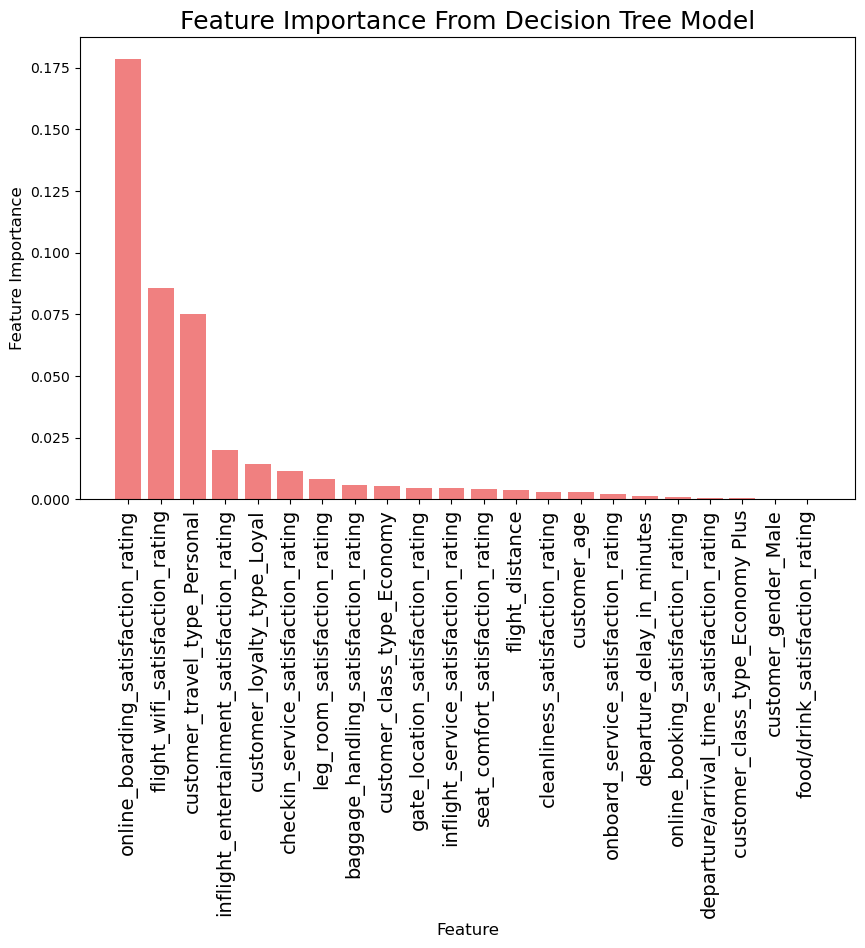

In [152]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': feat_importance
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='lightcoral')
plt.xlabel('Feature', fontsize=12)   
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance From Decision Tree Model', size=18)
plt.xticks(rotation='vertical', fontsize=14)
plt.show()

#### Model Results

Unfortunately, the decision tree feature importance doesn't show negative, so this limits the analysis I can provide.

##### To focus on

The feature importance is extremely top-heavy, with the top 3 ranked features having more importance than all the remaining features. These include:
- online boarding (~ equal to the next two combined)
- flight wifi
- customer travel type (personal)

The model doesn't necessarily tell me that increasing expenditure on these 3 areas would increase the number of satisfied customers, **just that these features are key to accurately predicting customer satisfaction (either satisfied or dissatisfied).**

So I will use some of the insights from my EDA:

1. online boarding had a below-average satisfaction rating
2. flight wifi had the lowest average satisfaction rating
3. customer travel type (personal)
    - has a noticeable negative correlation (one of the biggest also) of -0.45 to the target 
    - is the lowest ranking coefficient in the logistic model by far

**After reviewing all the information, I am advising the airline to focus on these three areas.**


##### To focus away from

- food/drink
- customer gender (male)
- class type (economy plus)

The model results don't necessarily suggest not focusing on these features; only that **these features were the least helpful in predicting customer satisfaction either way**. 

So I will look for some insights from my EDA:

1. food/drink satisfaction was below average (9/14)
2. the gender split is 50/50 & there is ~ no difference between the number of satisfied customers and their gender
3. the vast majority of flyers travelling for personal reasons are dissatisfied


**After reviewing all the information, I am advising the airline to
- **Increase investment in food/drink**
- **Conduct a further investigation/customer survey into customers travelling for personal reasons and increase expenditure on them to increase their customer satisfaction)**
- **not focus on customer gender**

## SECTION 5

## Feature Engineering

In the additional analysis in the prior notebook, I plotted a 'Customer Loyalty Type vs Travel Type Barchart'. I found that almost no disloyal customers were travelling for personal reasons. Considering customer loyalty type is one of the highest rated features and customer travel type personal is the third highest rated feature, I want to combine them into a new feature. There is a risk of multicollinearity, but it could also improve the model score. 

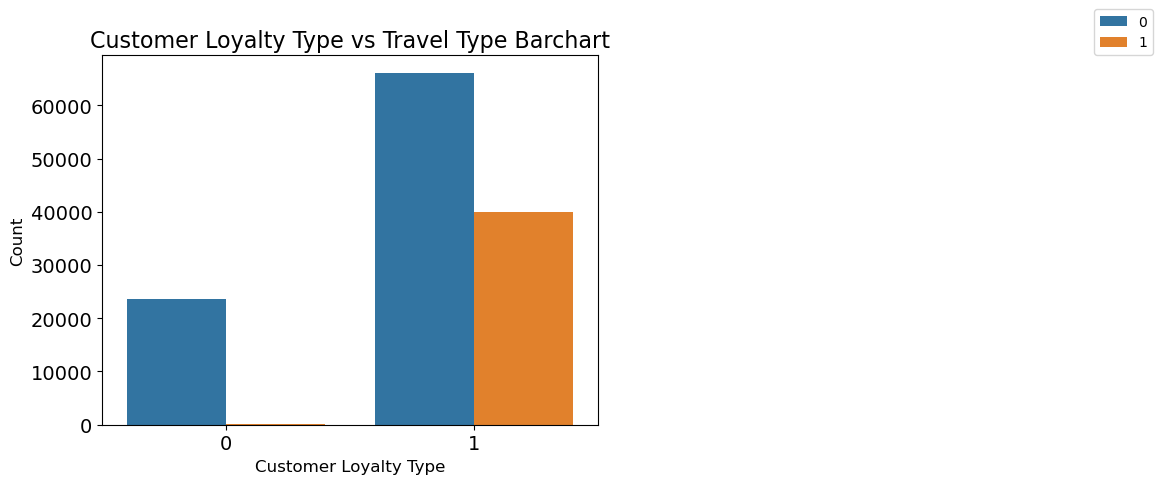

In [161]:
# Below I am plotting the same bar chart from notebook 2
sns.countplot(data = df, x = 'customer_loyalty_type_Loyal', hue = 'customer_travel_type_Personal')
plt.title('Customer Loyalty Type vs Travel Type Barchart', fontsize=16)
plt.xlabel('Customer Loyalty Type', fontsize=12)   
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = (2, 1))

I will call this new feature 'Business Loyal'[(code source)](https://www.tylervigen.com/spurious-correlations)

In [195]:
# Below I am creating a 'new_feature' function so I can do an 'if' and 'and'
def new_feature (row):
   if row['customer_loyalty_type_Loyal'] == 1 and row['customer_travel_type_Personal'] == 0:
      return '1'
   return '0'

In [196]:
# Below I am sanity checking that the function is working correctly
df.apply (lambda row: new_feature(row), axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
129875    1
129876    1
129877    1
129878    1
129879    1
Length: 129880, dtype: object

In [197]:
# Below I am adding the new column
df['business_loyal'] = df.apply (lambda row: new_feature(row), axis=1)

In [202]:
# Below I am sanity checking that the new column was added
df.head(2)

,customer_age,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,gate_location_satisfaction_rating,food/drink_satisfaction_rating,online_boarding_satisfaction_rating,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,...,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,satisfaction_target_Satisfied,customer_gender_Male,customer_loyalty_type_Loyal,customer_travel_type_Personal,customer_class_type_Economy,customer_class_type_Economy Plus,business_loyal
0,56,369,0,2,0,4,3,0,3,3,...,4,3,0,1,1,0,1,1,0,0
1,49,2486,0,2,1,4,2,1,3,2,...,3,2,0,1,1,0,1,1,0,0
2,55,1448,0,3,0,4,3,0,3,3,...,3,3,0,1,1,0,1,1,0,0
3,36,1501,0,4,0,3,4,0,4,4,...,5,4,0,1,0,0,1,1,0,0
4,55,577,0,5,0,3,3,5,3,3,...,4,3,0,1,1,0,1,1,0,0


In [199]:
# Below I am sanity checking that the column contains the correct number of options
df['business_loyal'].value_counts()

1    66114
0    63766
Name: business_loyal, dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype
---  ------                                      --------------   -----
 0   customer_age                                129880 non-null  int64
 1   flight_distance                             129880 non-null  int64
 2   flight_wifi_satisfaction_rating             129880 non-null  int64
 3   departure/arrival_time_satisfaction_rating  129880 non-null  int64
 4   online_booking_satisfaction_rating          129880 non-null  int64
 5   gate_location_satisfaction_rating           129880 non-null  int64
 6   food/drink_satisfaction_rating              129880 non-null  int64
 7   online_boarding_satisfaction_rating         129880 non-null  int64
 8   seat_comfort_satisfaction_rating            129880 non-null  int64
 9   inflight_entertainment_satisfaction_rating  129880 non-null  int64
 10  onboard_service_sati

In [208]:
# Below I am changing the 'business_loyal' data type to 'int' so I can use it in a seaborn heatmap
df['business_loyal'] = df['business_loyal'].astype('int')

<AxesSubplot:>

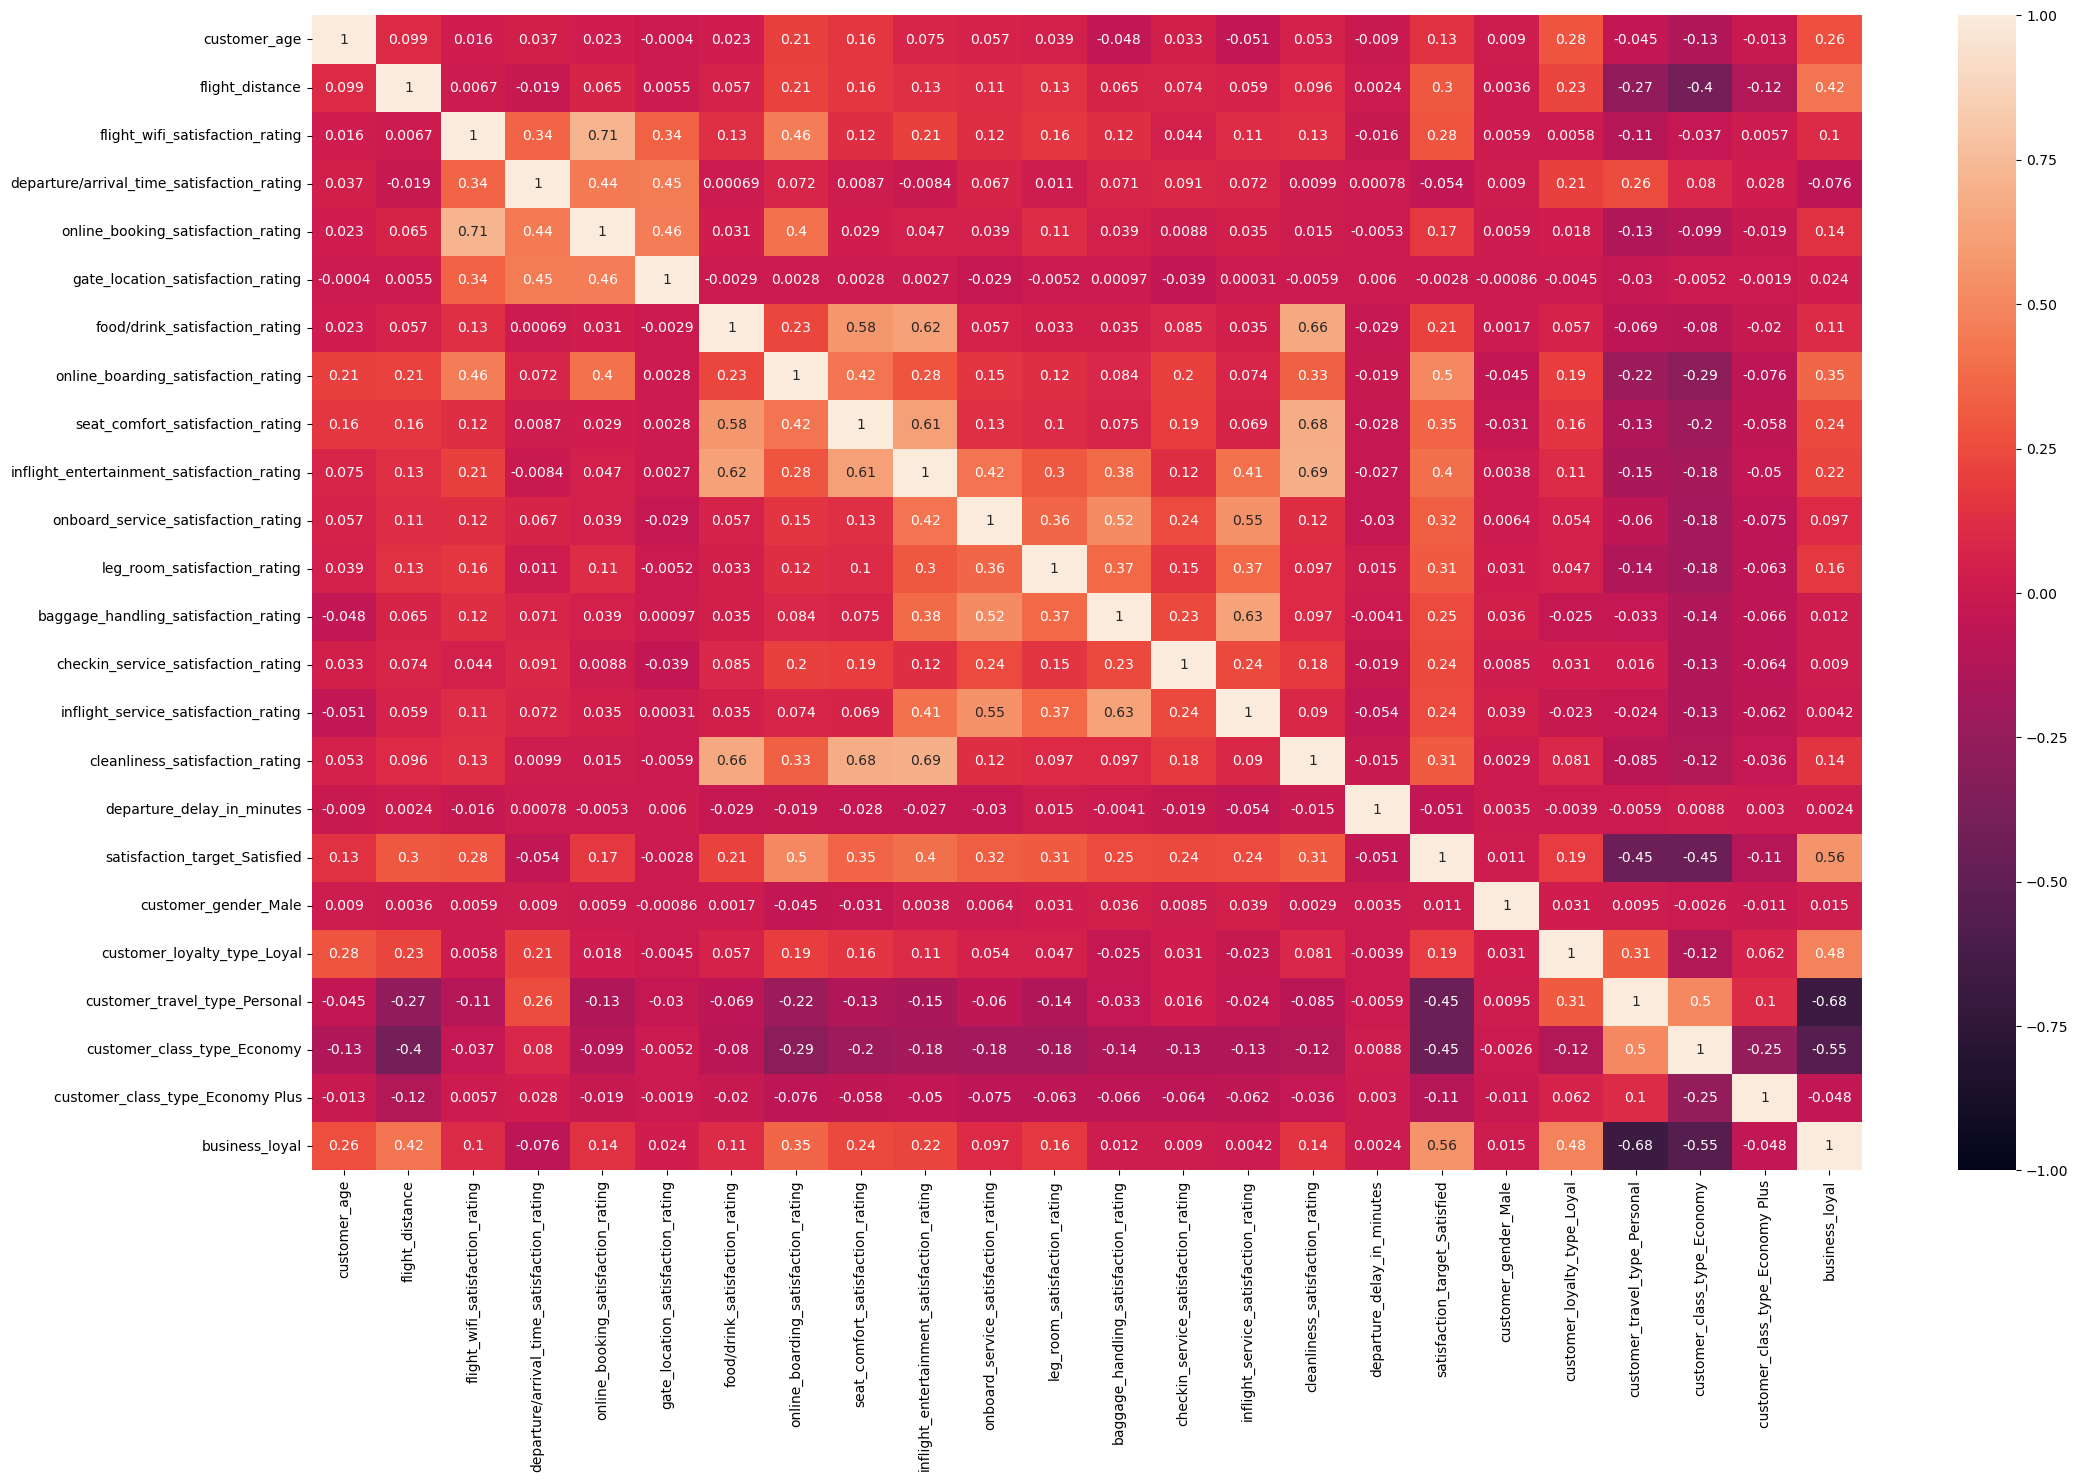

In [209]:
# Below I am plotting the heatmap based on the dataframe 'df'
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr().dropna(how = 'all').dropna(axis=1, how='all'), 
                    vmin=-1, vmax = 1, annot = True)

Worryingly, I can see some multicollinearity with several columns. This could reduce the performance of the model even if the feature is a good predictor of the customer satisfaction rating.

I will test this out by running the decision tree model again.

In [210]:
# importing relavent libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('DT', DecisionTreeClassifier())]

cachedir = mkdtemp()
pipe = Pipeline(estimators, memory = cachedir)

params = {'DT__max_depth': [1, 3, 5, 7, 10, 12, 15, 17, 20], 
          'reduce_dim__n_components': [None, 2, 5, 10]}

grid_search = GridSearchCV(pipe, param_grid=params)

fitted_search = grid_search.fit(X_train, y_train)

print(f"The fitted search score is {fitted_search.score(X_test, y_test)}")
print(f"The best parameters for the model are {fitted_search.best_params_}")

The fitted search score is 0.9078636690278206
The best parameters for the model are {'DT__max_depth': 15, 'reduce_dim__n_components': None}


Unfortunately - likely due to multicollinearity - the model didn't perform any better. It performed worse. In future, I won't create a new feature based on a combination of two existing columns.

## End of notebook review

**Notebook Achievements**

In this notebook I:
- Built a logistic, knn and decision tree model
- Ran each model to get the train and test scores
- Compared the base model to the optimal model
- Plotted the feature importance of each column for each model (for knn only based on 30% of the data due to loading times)
- Ran a classification report and confusion matrix for each model (for knn only based on 30% of the data due to loading times)
- Identified the best model
- Analysed the decision tree model
- Created a new feature and tested to see if it increased the score